In [1]:
import os
import os.path
import numpy as np
import glob
import matplotlib.pyplot as plt
import preprocessing_functions as pre
import training_functions as training
import skimage.io
import prediction as pred
import keras

In [2]:
val_images = glob.glob(r"C:\Users\tsche\Desktop\Master\2. Semester\Project Staining\validation\*d0.png") # define imagefolder
X_val = pre.stack_images(val_images, num_channels = 1)
val_images2 = glob.glob(r"C:\Users\tsche\Desktop\Master\2. Semester\Project Staining\validation\*.png")
images =  [x for x in val_images2 if x not in val_images]
Y_val = pre.stack_images(images, num_channels = 2)

In [3]:
# Imageset1
images1 = glob.glob(r"C:\Users\tsche\Desktop\Master\2. Semester\Project Staining\Imageset3\*d0.png")
val_images = [i.replace('validation','Imageset3') for i in val_images]
images =  [x for x in images1 if x not in val_images]
X_1 = pre.stack_images(images, num_channels = 1)
images2 = glob.glob(r"C:\Users\tsche\Desktop\Master\2. Semester\Project Staining\Imageset3\*.png")
val_images2 = [i.replace('validation','Imageset3') for i in val_images2]
all_im = images1 + val_images2
images =  [x for x in images2 if x not in all_im]
Y_1 = pre.stack_images(images, num_channels = 2)

In [4]:
# normalize images
(x_1, mean, std) = pre.norm_batch(X_1)
x_val = pre.norm(X_val, mean, std)
(y_1,mean,std) = pre.norm_batch(Y_1)
y_val = pre.norm(Y_val, mean, std)

In [5]:
# recenter images
X_train = pre.recenter(x_1)
Y_train = pre.recenter(y_1)
x_val = pre.recenter(x_val)
y_val = pre.recenter(y_val)

In [6]:
#define modelname
#names = ['d1d2_8im','d1d2_16im','d1d2_32im','d1d2_56im']
names = ['d1d2_25im_recentered']


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 64) 36928       batch_normalization[0][0]        
_____________________________________________________________________________________________

Epoch 1/50
10/10 [==============================] - 170s 17s/step - loss: 0.3676 - mse: 0.3676 - mae: 0.4768 - val_loss: 0.1689 - val_mse: 0.1689 - val_mae: 0.3804

Epoch 00001: val_loss improved from inf to 0.16893, saving model to d1d2_25im_recentered
INFO:tensorflow:Assets written to: d1d2_25im_recentered\assets
Epoch 2/50
10/10 [==============================] - 171s 17s/step - loss: 0.1332 - mse: 0.1332 - mae: 0.3106 - val_loss: 0.0795 - val_mse: 0.0795 - val_mae: 0.2404

Epoch 00002: val_loss improved from 0.16893 to 0.07946, saving model to d1d2_25im_recentered
INFO:tensorflow:Assets written to: d1d2_25im_recentered\assets
Epoch 3/50
10/10 [==============================] - 167s 17s/step - loss: 0.0929 - mse: 0.0929 - mae: 0.2389 - val_loss: 0.0336 - val_mse: 0.0336 - val_mae: 0.1295

Epoch 00003: val_loss improved from 0.07946 to 0.03358, saving model to d1d2_25im_recentered
INFO:tensorflow:Assets written to: d1d2_25im_recentered\assets
Epoch 4/50
10/10 [=======================

10/10 [==============================] - 141s 14s/step - loss: 0.0199 - mse: 0.0199 - mae: 0.0809 - val_loss: 0.0211 - val_mse: 0.0211 - val_mae: 0.0809

Epoch 00034: val_loss improved from 0.02191 to 0.02109, saving model to d1d2_25im_recentered
INFO:tensorflow:Assets written to: d1d2_25im_recentered\assets
Epoch 35/50
10/10 [==============================] - 141s 14s/step - loss: 0.0202 - mse: 0.0202 - mae: 0.0845 - val_loss: 0.0217 - val_mse: 0.0217 - val_mae: 0.0833

Epoch 00035: val_loss did not improve from 0.02109
Epoch 36/50
10/10 [==============================] - 141s 14s/step - loss: 0.0210 - mse: 0.0210 - mae: 0.0867 - val_loss: 0.0248 - val_mse: 0.0248 - val_mae: 0.0888

Epoch 00036: val_loss did not improve from 0.02109
Epoch 37/50
10/10 [==============================] - 141s 14s/step - loss: 0.0222 - mse: 0.0222 - mae: 0.0893 - val_loss: 0.0238 - val_mse: 0.0238 - val_mae: 0.0856

Epoch 00037: val_loss did not improve from 0.02109
Epoch 38/50
10/10 [====================

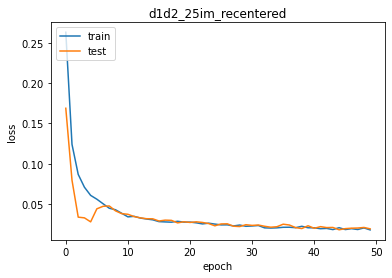

Lossy conversion from float64 to uint8. Range [-13748.329217172177, 31236.69680863897]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-13748.329217172177, 20035.105451604795]. Convert image to uint8 prior to saving to suppress this warning.


(144, 128, 128, 2)


In [7]:
loss_list = []
for name in names:
    history = training.train(X_train, Y_train, x_val, y_val,2, name)
    dir = os.path.join(r'C:\Users\tsche\Desktop\Master\2. Semester\Project Staining\gitrepo\TeresaScheidt\training_results', name +'_loss.png')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(name)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig(dir)
    plt.show()
    model = keras.models.load_model(name, compile=False)
    image = x_val[0]
    output = pred.predict(model, image, 128, 128, num_outputs=2)
    output = pre.center_back(output)
    output_norm = pre.unnormalize(output, mean, std)
    im = output_norm[:,:,0]
    dir_d1 = os.path.join(r'C:\Users\tsche\Desktop\Master\2. Semester\Project Staining\gitrepo\TeresaScheidt\training_results', name + '_d1.png')
    dir_d2 = os.path.join(r'C:\Users\tsche\Desktop\Master\2. Semester\Project Staining\gitrepo\TeresaScheidt\training_results', name +'_d2.png')
    skimage.io.imsave(dir_d1, im)
    im = output_norm[:,:,1]
    skimage.io.imsave(dir_d2, im)

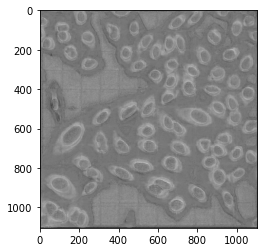

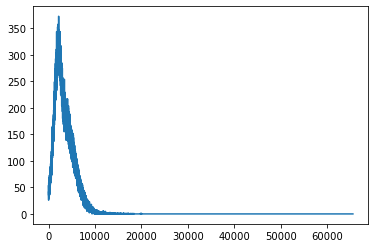

In [10]:
#output_n = pre.center_back(output)
#output_n2 = pre.unnormalize(output_n, mean, std)
im = output_norm[:,:,1]
plt.imshow(im, cmap = 'gray')
plt.show()
histogram, bin_edges = np.histogram(im, bins=65535, range=(0,65535))
plt.plot(bin_edges[0:-1], histogram)